In [143]:
# %matplotlib widget
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision
from transforms import *

In [150]:
transforms1 = torchvision.transforms.Compose([
    lambda x: 0.2126*x[...,0] + 0.7152*x[...,1] + 0.0722*x[...,2],
    lambda x: (x*255).astype(int),
    CLAHE(40.0, (16,16)),
    DownsampleShortAxis(384),
    PadOrCenterCrop((384,384)),
    lambda x: (x - x.min()) / (x.max() - x.min()), 
])

transforms2 = torchvision.transforms.Compose([
    lambda x: 0.2126*x[...,0] + 0.7152*x[...,1] + 0.0722*x[...,2],
    lambda x: (x*255).astype(int),
    CLAHE(40.0, (32,32)),
    DownsampleShortAxis(384),
    PadOrCenterCrop((384,384)),
    lambda x: (x - x.min()) / (x.max() - x.min()), 
])

transforms1 = torchvision.transforms.Compose([
    DownsampleShortAxis(384),
    PadOrCenterCrop((384,384)),
])

15_right.jpeg


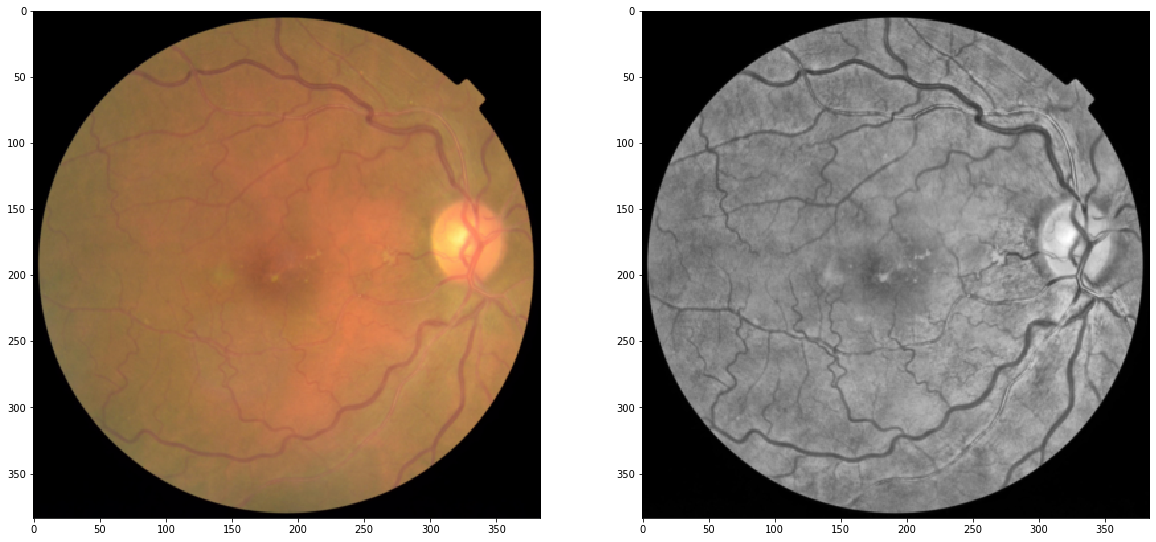

10_right.jpeg


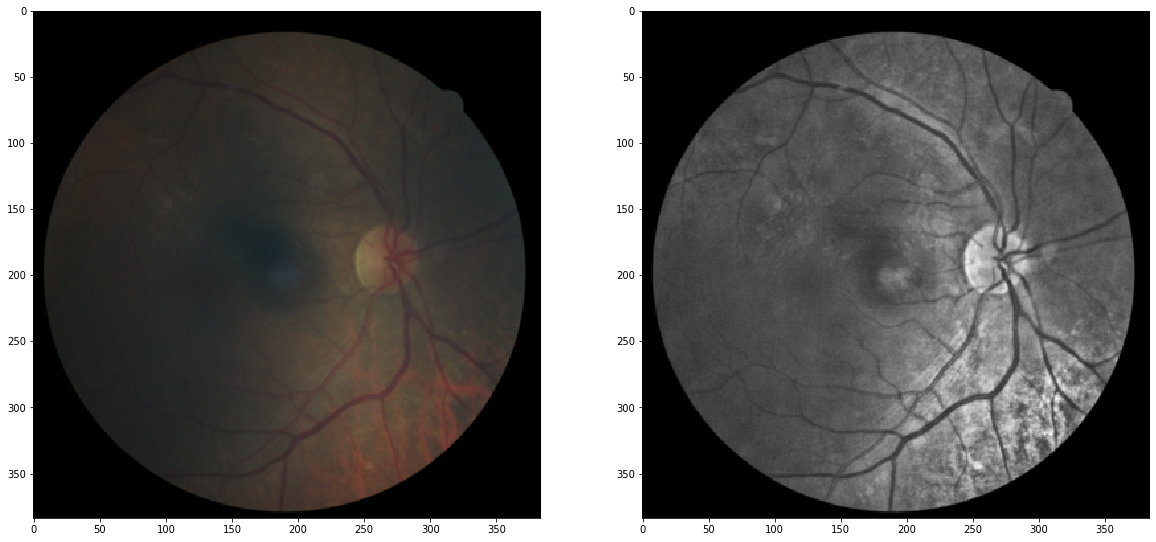

17_right.jpeg


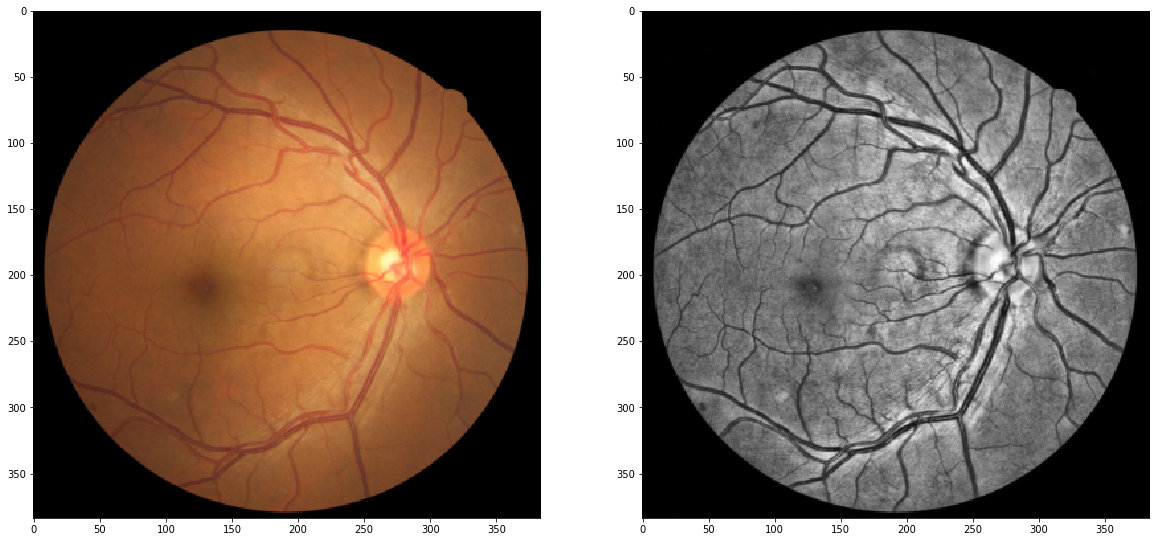

13_left.jpeg


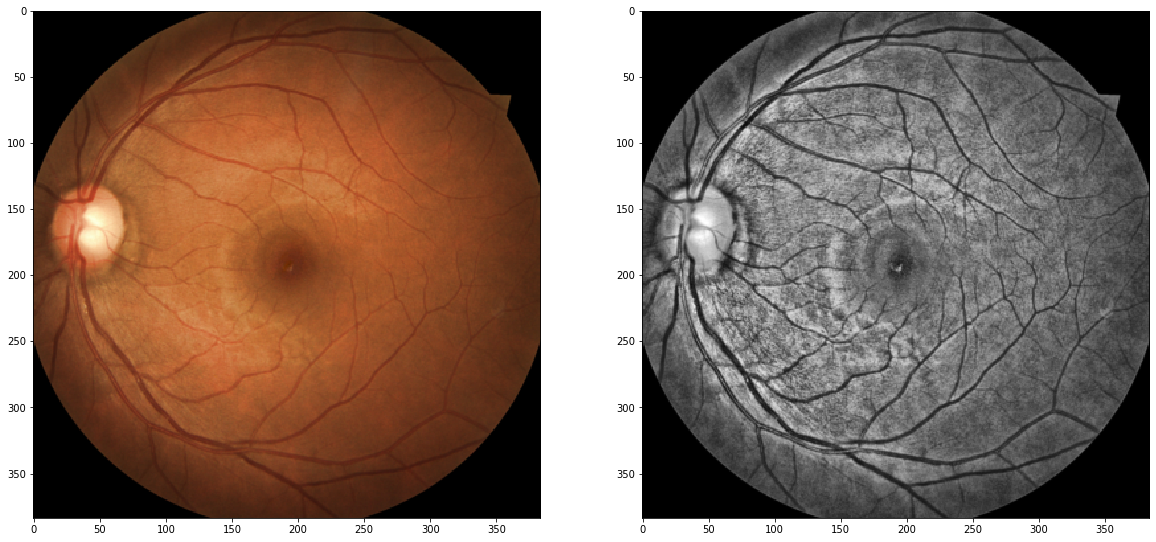

15_left.jpeg


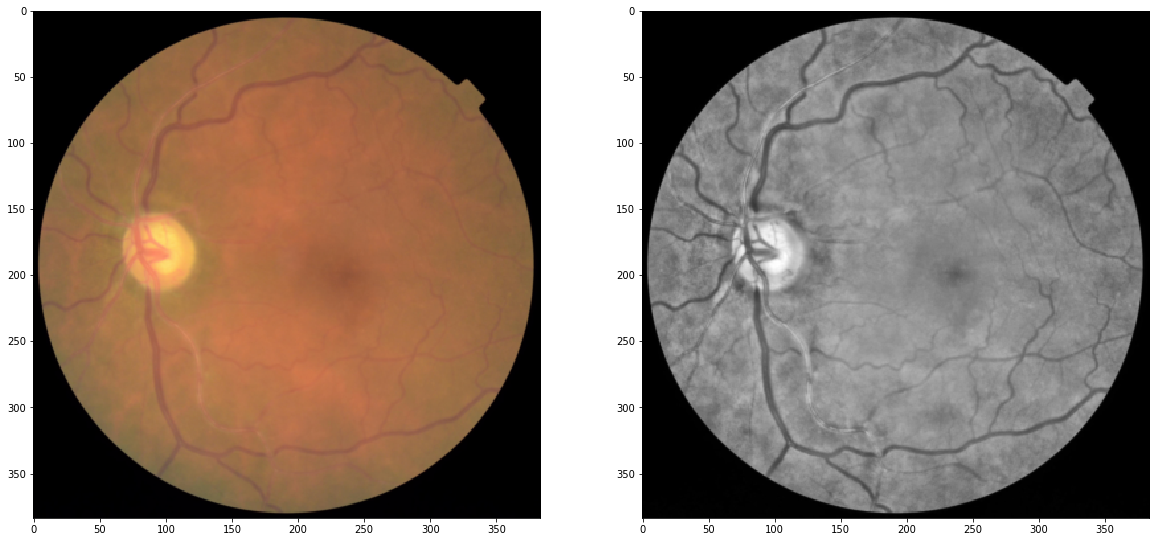

10_left.jpeg


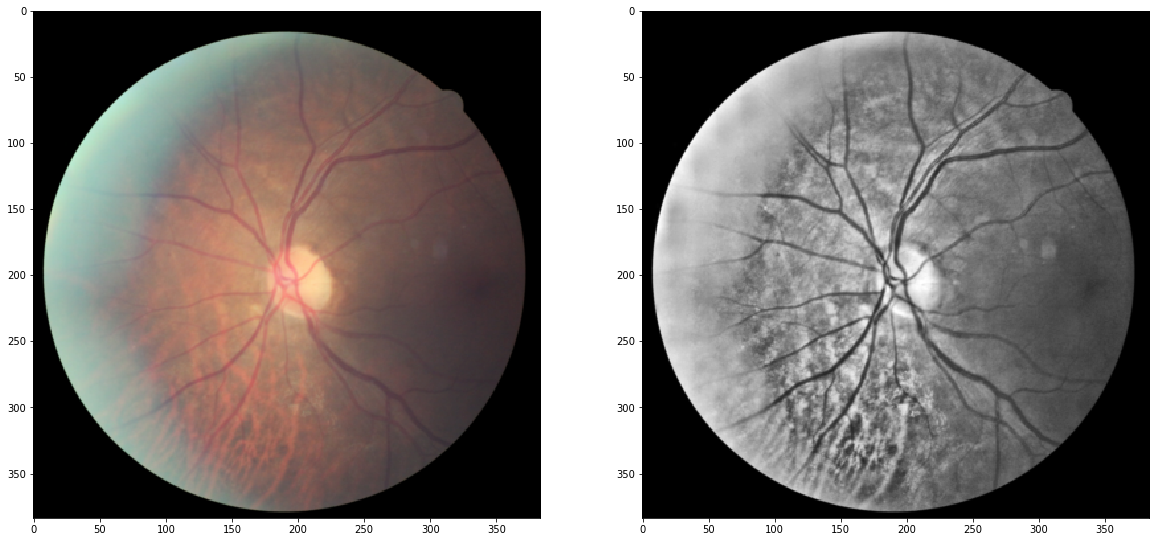

16_left.jpeg


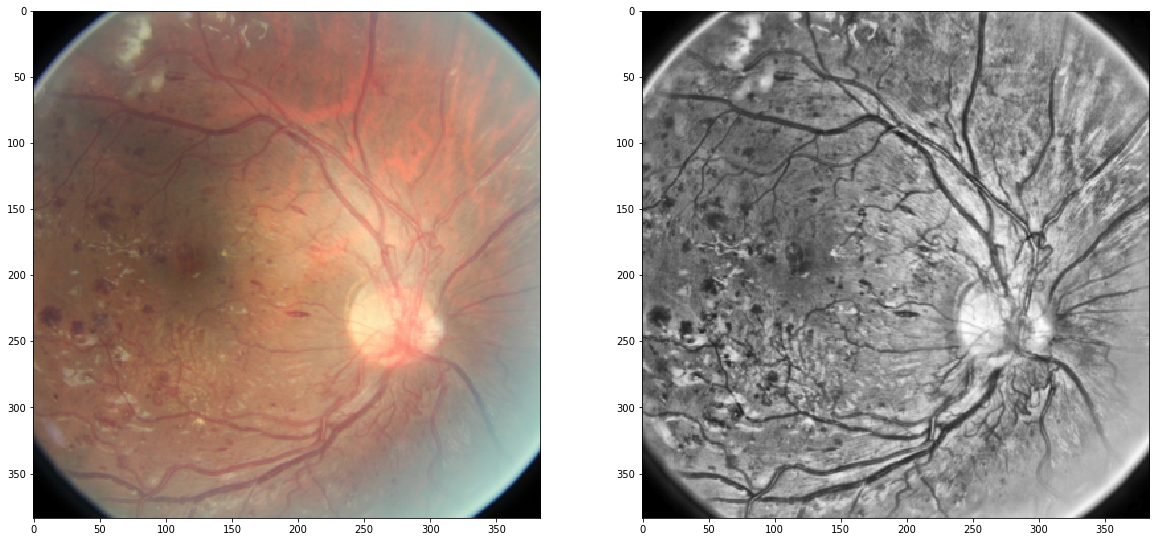

13_right.jpeg


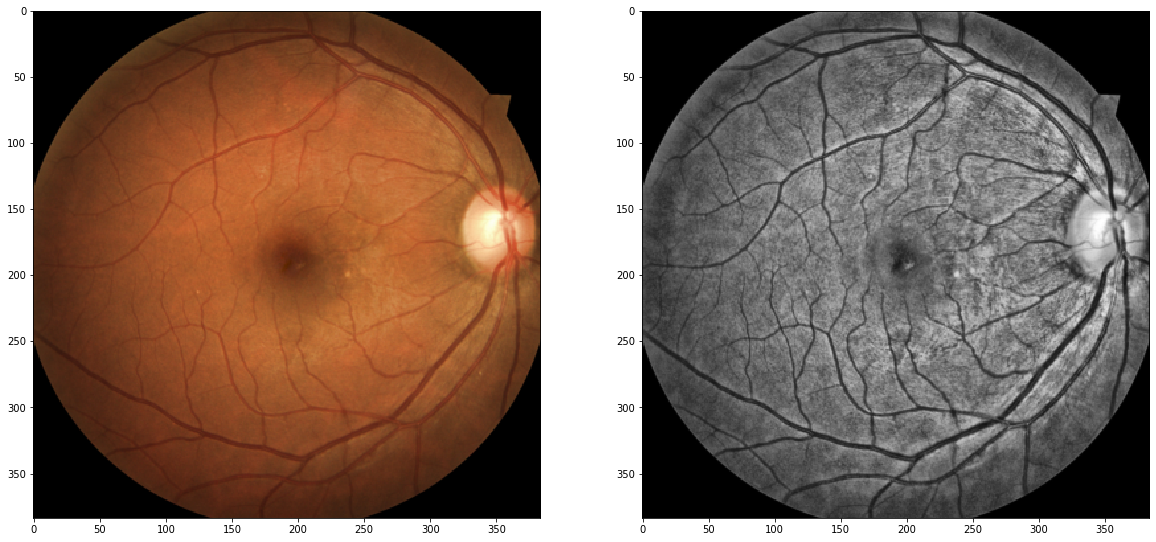

16_right.jpeg


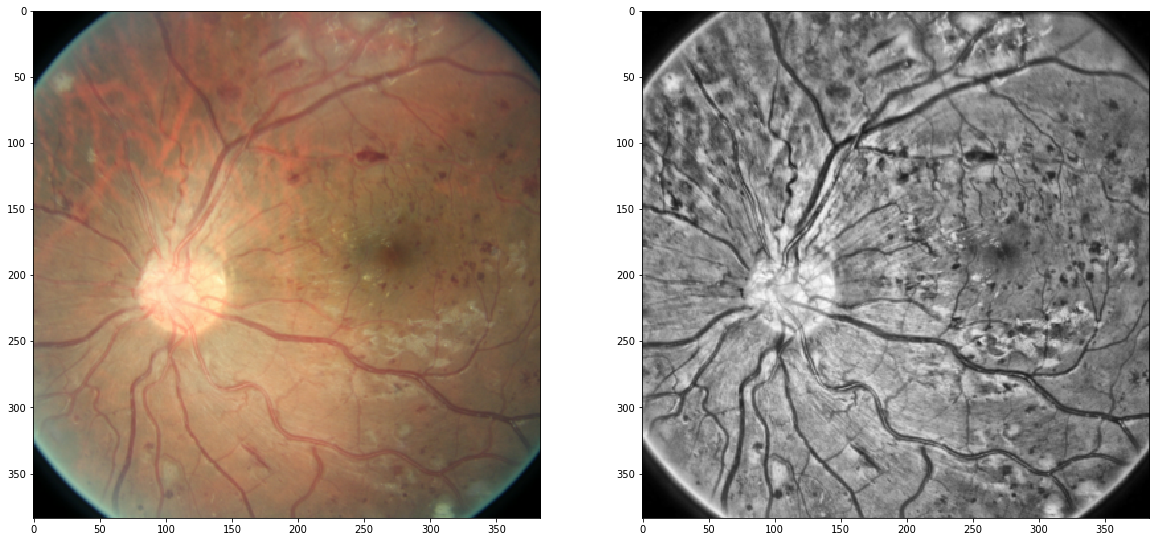

17_left.jpeg


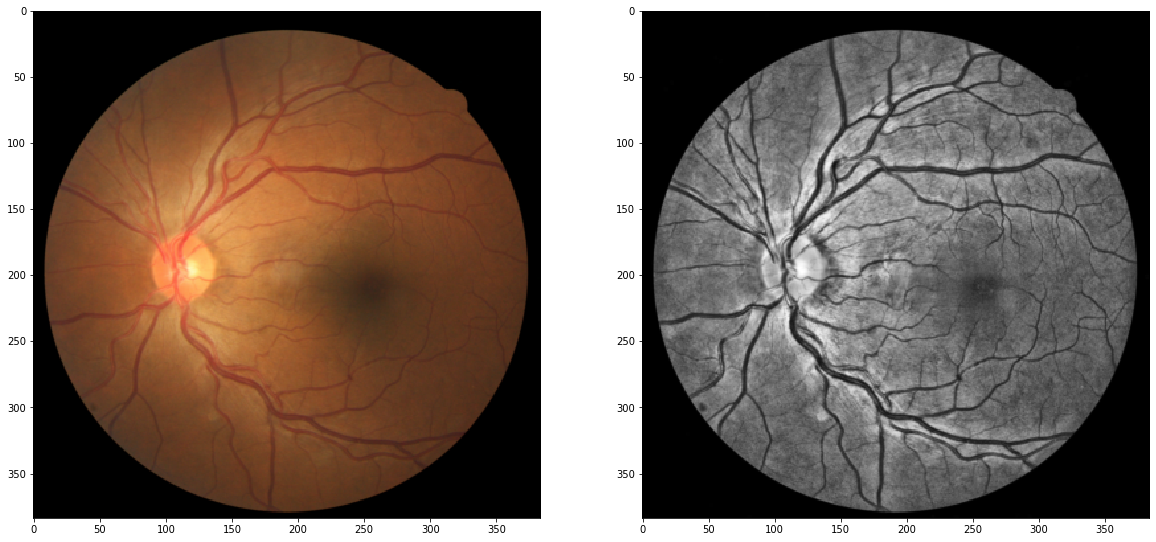

In [151]:
root = "/Users/gcodes/Downloads/diabetic-retinopathy-detection/sample/"
for f in os.listdir(root):
    img = cv2.imread(os.path.join(root,f))[...,::-1]
    print(f)
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    ax1.imshow(transforms1(img), cmap='gray')
    ax2.imshow(transforms2(img), cmap='gray')
    plt.show()